In [50]:
import datetime as dt
import pandas as pd
import numpy as np


import scipy.stats as stats
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
from scipy.stats import norm


import yfinance as yfin
yfin.pdr_override()

In [51]:
#Setting some arbitrary time period

end = dt.datetime.now()
start =end - dt.timedelta(days=1500)


In [11]:
# Importing some stock data
df = pdr.get_data_yahoo('VAS.AX', start, end)




[*********************100%%**********************]  1 of 1 completed


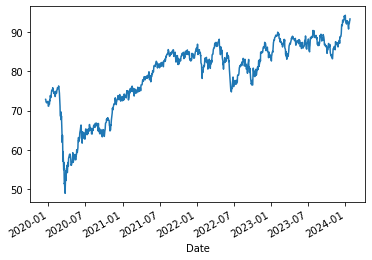

In [52]:
adjusted_close.plot()
plt.show()


#### Simple and Log Returns

In [53]:
#Simple and Log Returns
adjusted_close = df['Adj Close']

# simple returns
sReturns = adjusted_close.pct_change().dropna()


# log returns
lnReturns=np.log(adjusted_close/adjusted_close.shift(1)).dropna()






<function matplotlib.pyplot.show(*args, **kw)>

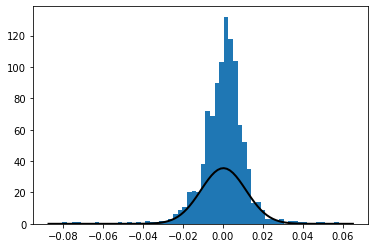

In [54]:
# Histogram of log returns
plt.hist(lnReturns, bins=60)



mu, std = norm.fit(lnReturns)
xmin, xmax = plt.xlim() 
x = np.linspace(xmin, xmax, 100) 
curve = norm.pdf(x,mu,std)
plt.plot(x, curve, 'k', linewidth=2)

plt.show



#### Testing for normality

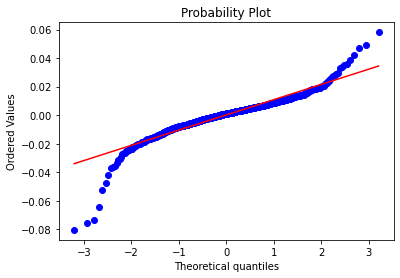

<function matplotlib.pyplot.show(*args, **kw)>

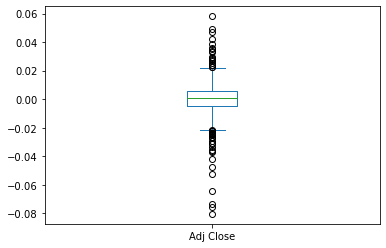

In [55]:
# Quantile - Quantile Plot
stats.probplot(lnReturns, dist='norm', plot=pylab)
plt.show()

# Box Plots
lnReturns.plot(kind = 'box')
plt.show


#### Q-Q plot
a Q–Q plot (quantile–quantile plot) is a probability plot, for comparing two probability distributions by plotting their quantiles against each other.

If the two distributions being compared are similar, the points in the Q–Q plot will approximately lie on the identity line y = x

If both sets of quantiles came from the same distribution, we should see the points forming a line that's roughly straight.


#### Over-Dispersed Data
ver-dispersed data has an increased number of outliers (i.e. the distribution has fatter tails than a normal distribution). Over-dispersed data is also known as having a leptokurtic distribution and as having positive excess kurtosis.

the smallest observations are smaller than you would expect from a normal distribution

the largest observations are larger than you would expect from a normal distribution

Overall, this mans our observed distribution has greater chance of extreme or negative events


#### Box Plot
It is clear that while returns may seem normally distributed with mean zero returns, there is an extremely significant amount of outliers, with larger significant outliers on the negative side, which is also indicated by the Q-Q plot.

#### Hypothesis Testing 

#### Kolmogorov Smirnov test
can be used to test whether a sample came from a given reference probability distribution

"How likely is it that we would see a collection of samples like this if they were drawn from that probability distribution?"


In [56]:
ks_statistic, p_value = stats.kstest(lnReturns, 'norm', args = (lnReturns.mean(), lnReturns.std()))
print(ks_statistic, p_value)
if p_value > 0.05:
    print( 'Gaussian at the 0.05 significance level')
else:
    print('Not Gaussian at the 0.05 significane level')

0.0793119268995417 4.030694870414915e-06
Not Gaussian at the 0.05 significane level


#### Shapiro Wilk Test
The Shapiro–Wilk test is a test of normality. This a stronger test for seeing if the sample is drawn from a normal distribution. 

Cannot be used for testing against other distributions outside of normal 

if the sample size is sufficiently large this test may detect even trivial departures from the null hypothesis. 

additional investigation of the effect size is typically advisable, e.g., a Q–Q plot in this case.


In [57]:
sw_stat, p = stats.shapiro(lnReturns)
print('stat=%.3f, p=%.3f' % (sw_stat, p))
if p_value > 0.05:
    print('Gaussian at the 0.05 significance level')
else:
    print('Not Gaussian at the 0.05 significane level')

stat=0.897, p=0.000
Not Gaussian at the 0.05 significane level


#### Jarque Bera Test
This is test for goodness-of-fit of whether sample data have the skewness and kurtosis matching a normal distribution.

It is well documented, and evident from above tests, that stock returns are not normally distributed, thought it is an acceptable approximation, where often the distributions of returns found in the markets often have fatter tails (Kurtosis) and or have skewness.

The test statistic is always nonnegative. If it is far from zero, it signals the data do not have a normal distribution.


A positive Kurtosis indicates heavier tails and more peaked distribution. Thus, it is indicating higher levels of risk from the large price movements

A negative skewness means the probability of getting an outcome below the mean is higher than the probability of achieving an outcome above the mean. the most extreme values are found further to the left. As an investor, this indicates you will see some small gains and also see some large losses.


In [58]:
jb_stat, p = stats.jarque_bera(lnReturns)
print('stat=%.3f, p=%.3f' % (jb_stat, p))
if p_value > 0.05:
    print('Gaussian at the 0.05 significance level')
else:
    print('Not Gaussian at the 0.05 significane level')

kur = stats.kurtosis(lnReturns)
print('Kurtosis is ',kur)

skew = stats.skew(lnReturns)
print('Skewness is ',skew)    

stat=3789.370, p=0.000
Not Gaussian at the 0.05 significane level
Kurtosis is  9.115815675740329
Skewness is  -1.0725990782668773
